In [ ]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install geopandas
!pip install covidcast

In [15]:
import snscrape.modules.twitter as sntwitter
user = '@BarackObama'
user = '@CDCgov'
keyword = '(mask OR covering)'
since = 'since:2020-10-09 '
until = 'until:2021-01-31 '
lang = 'lang:en'
maxTweets = 1000
tweets = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:' + user + keyword + since + until + lang).get_items()) :
        if i > maxTweets :
            break
        tweets.append({
            "username":tweet.user.username,
            "url":tweet.url,
            "date":tweet.date,
            "likeCount":tweet.likeCount,
            "retweetCount":tweet.retweetCount,
            "replyCount":tweet.replyCount
            #"content":tweet.content
        })
print(tweets)

[{'username': 'CDCgov', 'url': 'https://twitter.com/CDCgov/status/1350516670318706692', 'date': datetime.datetime(2021, 1, 16, 18, 54, tzinfo=datetime.timezone.utc), 'likeCount': 545, 'retweetCount': 333, 'replyCount': 77}, {'username': 'CDCgov', 'url': 'https://twitter.com/CDCgov/status/1350142392695988231', 'date': datetime.datetime(2021, 1, 15, 18, 6, 45, tzinfo=datetime.timezone.utc), 'likeCount': 499, 'retweetCount': 387, 'replyCount': 69}, {'username': 'CDCgov', 'url': 'https://twitter.com/CDCgov/status/1349815812371197952', 'date': datetime.datetime(2021, 1, 14, 20, 29, 2, tzinfo=datetime.timezone.utc), 'likeCount': 198, 'retweetCount': 118, 'replyCount': 70}, {'username': 'CDCgov', 'url': 'https://twitter.com/CDCgov/status/1349807965021360130', 'date': datetime.datetime(2021, 1, 14, 19, 57, 51, tzinfo=datetime.timezone.utc), 'likeCount': 1208, 'retweetCount': 932, 'replyCount': 107}, {'username': 'CDCgov', 'url': 'https://twitter.com/CDCgov/status/1349778305550069763', 'date': 

In [36]:
from datetime import date
import covidcast
location = "ak"
data = covidcast.signal("indicator-combination", "confirmed_incidence_prop",
                        date(2021, 1, 20), date(2021, 1, 30),
                        "state").query('geo_value == "{}"'.format(location))
print(data)

  geo_value                    signal time_value      issue  lag      value  \
0        ak  confirmed_incidence_prop 2021-01-20 2021-01-24    4  21.188034   
0        ak  confirmed_incidence_prop 2021-01-21 2021-01-24    3  27.612792   
0        ak  confirmed_incidence_prop 2021-01-22 2021-01-26    4  34.994430   
0        ak  confirmed_incidence_prop 2021-01-23 2021-01-26    3  32.943975   
0        ak  confirmed_incidence_prop 2021-01-24 2021-01-29    5  22.008215   
0        ak  confirmed_incidence_prop 2021-01-25 2021-01-28    3  10.662365   
0        ak  confirmed_incidence_prop 2021-01-26 2021-02-01    6  10.388971   
0        ak  confirmed_incidence_prop 2021-01-27 2021-02-01    5  22.828397   
0        ak  confirmed_incidence_prop 2021-01-28 2021-02-01    4  27.339398   
0        ak  confirmed_incidence_prop 2021-01-29 2021-02-01    3  24.742155   
0        ak  confirmed_incidence_prop 2021-01-30 2021-02-01    2  17.360518   

  stderr sample_size geo_type            data_sourc

In [818]:
def get_tweets(user='@BarackObama', keyword='(mask OR masks)', since='2020-10-09', until='2021-01-31', lang='lang:en'):
    # user = '@BarackObama'
#     user = '@CDCgov'
    user += ' '
    keyword += ' '
#     since='2021-01-16'
#     until='2021-01-17'
    since = 'since:' + since + ' '
    until = 'until:' + until + ' '
    maxTweets = 1000
    tweets = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:' + user + keyword + since + until + lang).get_items()) :
            if i > maxTweets :
                break
            tweets.append({
#                 "username":tweet.user.username,
#                 "url":tweet.url,
                "time_value":tweet.date.strftime("%Y-%m-%d"),
                "likeCount":tweet.likeCount,
                "retweetCount":tweet.retweetCount,
                "replyCount":tweet.replyCount,
                "quoteCount":tweet.quoteCount
                #"content":tweet.content
            })
    return tweets
tweets = get_tweets()
print(tweets)

[{'time_value': '2021-01-21', 'likeCount': 420841, 'retweetCount': 39650, 'replyCount': 6356, 'quoteCount': 1486}, {'time_value': '2020-12-21', 'likeCount': 230454, 'retweetCount': 23574, 'replyCount': 3747, 'quoteCount': 1090}, {'time_value': '2020-11-25', 'likeCount': 283118, 'retweetCount': 23005, 'replyCount': 9479, 'quoteCount': 2566}]


In [66]:
from datetime import datetime

def get_data(location="nation", since='2021-1-10', until='2021-1-20'):
    since_date = datetime.strptime(since, '%Y-%m-%d')
    until_date = datetime.strptime(until, '%Y-%m-%d')
    
    if location == "nation":
        data = covidcast.signal("indicator-combination", "confirmed_incidence_prop", since_date, until_date, location)
    else:
        data = covidcast.signal("indicator-combination", "confirmed_incidence_prop", since_date, until_date, 
                                "state").query('geo_value == "{}"'.format(location))

    return data

get_data("ak")

,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
0,ak,confirmed_incidence_prop,2021-01-10,2021-01-19,9,33.627460,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-11,2021-01-20,9,23.648579,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-12,2021-01-19,7,0.000000,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-13,2021-01-24,11,55.088887,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-14,2021-01-19,5,44.563219,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-15,2021-01-19,4,39.915521,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-16,2021-01-19,3,24.605458,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-17,2021-01-22,5,37.865066,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-18,2021-01-24,6,20.094458,None,None,state,indicator-combination
0,ak,confirmed_incidence_prop,2021-01-19,2021-01-22,3,17.360518,None,None,state,indicator-combination


In [180]:
import pandas as pd

data = pd.read_csv("covidcast_state.csv")
data = data[["geo_value", "time_value", "value", "sample_size"]]
#print(data.head)

positive = data["sample_size"] * data["value"] / 100
negative = data["sample_size"] * (100 - data["value"]) / 100
#print(positive)
#print(negative)
data["positive"] = positive
data["negative"] = negative
#print(data)

data2 = data.groupby("time_value").sum()
data2["value"] = data[["time_value", "value"]].groupby("time_value").mean()
data2["geo_value"] = "us"
data2.reset_index(inplace=True)
#print(data)
#print(data2)

data3 = data.append(data2, ignore_index=True)
data3.sort_values(["time_value", "geo_value"], inplace=True)
data3 = data3.round(4)
data3.reset_index(drop=True, inplace=True)
print(data3.head)
data3.to_csv("covidcast_all.csv")

<bound method NDFrame.head of      geo_value  time_value    value  sample_size    positive   negative
0           ak  2020-10-09  81.6964     783.0000    639.6830   143.3170
1           al  2020-10-09  83.6434    3328.0716   2783.7129   544.3587
2           ar  2020-10-09  84.0917    2337.9293   1966.0044   371.9249
3           az  2020-10-09  87.0808    5134.7713   4471.4005   663.3708
4           ca  2020-10-09  91.9338   19779.1877  18183.7683  1595.4194
...        ...         ...      ...          ...         ...        ...
5975        vt  2021-01-31  97.0857     874.0014    848.5304    25.4710
5976        wa  2021-01-31  95.5336    6771.6827   6469.2297   302.4530
5977        wi  2021-01-31  91.0646    5230.9937   4763.5826   467.4111
5978        wv  2021-01-31  94.1223    2219.2532   2088.8117   130.4415
5979        wy  2021-01-31  78.4354     585.7585    459.4422   126.3163

[5980 rows x 6 columns]>


In [181]:
covidcast_data = pd.read_csv("covidcast_all.csv")
trends_data = pd.read_csv("trends/us.csv", header=1)
trends_data.rename(columns={trends_data.columns[0]: "time_value", trends_data.columns[1]: "trend"}, inplace=True)
trends_data["geo_value"] = "us"
#print(trends_data)

import os
file_list = os.listdir("trends")
for file in file_list:
    if file != "us.csv":
        state = file.split(".")[0]
        state_data = pd.read_csv("trends/{}.csv".format(state), header=1)
        state_data.rename(columns={state_data.columns[0]: "time_value", state_data.columns[1]: "trend"}, inplace=True)
        state_data["geo_value"] = state
        trends_data = trends_data.append(state_data, ignore_index=True)


trends_data.sort_values(["time_value", "geo_value"], inplace=True)
trends_data.reset_index(drop=True, inplace=True)
print(trends_data)
trends_data.to_csv("trends_all.csv")

mask_all = covidcast_data.merge(trends_data, how="inner", on=["time_value", "geo_value"]).reset_index(drop=True)
mask_all.drop(mask_all.columns[0], axis=1, inplace=True)
print(mask_all)
mask_all.to_csv("mask_all.csv")

      time_value  trend geo_value
0     2020-10-09     20        ak
1     2020-10-09     57        al
2     2020-10-09     45        ar
3     2020-10-09     80        az
4     2020-10-09     69        ca
...          ...    ...       ...
5975  2021-01-31     60        vt
5976  2021-01-31     82        wa
5977  2021-01-31     34        wi
5978  2021-01-31     34        wv
5979  2021-01-31     30        wy

[5980 rows x 3 columns]
     geo_value  time_value    value  sample_size    positive   negative  trend
0           ak  2020-10-09  81.6964     783.0000    639.6830   143.3170     20
1           al  2020-10-09  83.6434    3328.0716   2783.7129   544.3587     57
2           ar  2020-10-09  84.0917    2337.9293   1966.0044   371.9249     45
3           az  2020-10-09  87.0808    5134.7713   4471.4005   663.3708     80
4           ca  2020-10-09  91.9338   19779.1877  18183.7683  1595.4194     69
...        ...         ...      ...          ...         ...        ...    ...
5975        vt

      Unnamed: 0 geo_value  time_value    value  sample_size    positive  \
0              0        ak  2020-10-09  81.6964     783.0000    639.6830   
1              1        al  2020-10-09  83.6434    3328.0716   2783.7129   
2              2        ar  2020-10-09  84.0917    2337.9293   1966.0044   
3              3        az  2020-10-09  87.0808    5134.7713   4471.4005   
4              4        ca  2020-10-09  91.9338   19779.1877  18183.7683   
...          ...       ...         ...      ...          ...         ...   
5975        5975        vt  2021-01-31  97.0857     874.0014    848.5304   
5976        5976        wa  2021-01-31  95.5336    6771.6827   6469.2297   
5977        5977        wi  2021-01-31  91.0646    5230.9937   4763.5826   
5978        5978        wv  2021-01-31  94.1223    2219.2532   2088.8117   
5979        5979        wy  2021-01-31  78.4354     585.7585    459.4422   

       negative  trend  
0      143.3170     20  
1      544.3587     57  
2      371.9

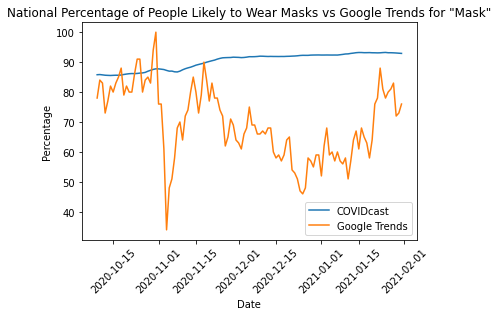

In [445]:
import matplotlib.pyplot as plt
import numpy as np

mask_data = pd.read_csv("mask_all.csv")
mask_na = mask_data.query('geo_value == "us"').reset_index(drop=True)
print(mask_data)
print(mask_na)

from matplotlib import pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

import datetime
dates = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in mask_na["time_value"]]

fig, ax = plt.subplots()
ax.plot_date(dates, mask_na["value"], '-', label="COVIDcast")
ax.plot_date(dates, mask_na["trend"], '-', label="Google Trends")
plt.title('National Percentage of People Likely to Wear Masks vs Google Trends for "Mask"')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()

# from matplotlib.dates import DateFormatter, MonthLocator
# locator = MonthLocator()
# formatter = DateFormatter("%b '%y")
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.show()

In [198]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [709]:
mask_data = pd.read_csv("mask_all.csv")
df = mask_data[["time_value", "geo_value", "trend"]].reset_index(drop=True)
df["time_value"] = df["time_value"].apply(lambda x: int(x.replace("-", "")))
print(df)
df = pd.get_dummies(df)

import numpy as np
X = np.array(df)
y = np.array(mask_data["value"])
print(X)

      time_value geo_value  trend
0       20201009        ak     20
1       20201009        al     57
2       20201009        ar     45
3       20201009        az     80
4       20201009        ca     69
...          ...       ...    ...
5975    20210131        vt     60
5976    20210131        wa     82
5977    20210131        wi     34
5978    20210131        wv     34
5979    20210131        wy     30

[5980 rows x 3 columns]
[[20201009       20        1 ...        0        0        0]
 [20201009       57        0 ...        0        0        0]
 [20201009       45        0 ...        0        0        0]
 ...
 [20210131       34        0 ...        1        0        0]
 [20210131       34        0 ...        0        1        0]
 [20210131       30        0 ...        0        0        1]]


In [857]:
mask_data = pd.read_csv("mask_all.csv")
df = mask_data[["time_value", "geo_value", "trend"]].reset_index(drop=True)
df = mask_data[["time_value", "geo_value"]].reset_index(drop=True)
tweet_data = pd.DataFrame.from_records(tweets).groupby("time_value").sum()
print(tweet_data)
likeCount = tweet_data["likeCount"].mean()
retweetCount = tweet_data["retweetCount"].mean()
replyCount = tweet_data["replyCount"].mean()
quoteCount = tweet_data["quoteCount"].mean()
df = df.merge(tweet_data, how="left", on="time_value").reset_index(drop=True).fillna(0)
df["time_value"] = df["time_value"].apply(lambda x: int(x.replace("-", "")))

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[["geo_value"]]).toarray())
df = df.join(enc_df).drop(df[["geo_value"]], axis=1)
print(df)
df.to_csv("training.csv")

query = pd.DataFrame({"time_value":[20210201], "geo_value":["wa"], "trend":[82]})
enc_df = pd.DataFrame(enc.transform(query[["geo_value"]]).toarray())
query = query.join(enc_df).drop(query[["geo_value"]], axis=1)
print(query)

import numpy as np
X = np.array(df)
y = np.array(mask_data["value"])
print(X)

            likeCount  retweetCount  replyCount  quoteCount
time_value                                                 
2020-11-25     283118         23005        9479        2566
2020-12-21     230454         23574        3747        1090
2021-01-21     420841         39650        6356        1486
      time_value  likeCount  retweetCount  replyCount  quoteCount    0    1  \
0       20201009        0.0           0.0         0.0         0.0  1.0  0.0   
1       20201009        0.0           0.0         0.0         0.0  0.0  1.0   
2       20201009        0.0           0.0         0.0         0.0  0.0  0.0   
3       20201009        0.0           0.0         0.0         0.0  0.0  0.0   
4       20201009        0.0           0.0         0.0         0.0  0.0  0.0   
...          ...        ...           ...         ...         ...  ...  ...   
5975    20210131        0.0           0.0         0.0         0.0  0.0  0.0   
5976    20210131        0.0           0.0         0.0         0.0  0

In [858]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    train_x, test_x = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
print(len(train_y))    
print(len(test_y))
print(test_x)

4984
996
[[2.0210112e+07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0210112e+07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0210112e+07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.0210131e+07 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0210131e+07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [2.0210131e+07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]


In [859]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 50)
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

query = pd.DataFrame({"time_value":[20220201], "geo_value":["wa"], 
                      "likeCount":likeCount, "retweetCount":retweetCount, "replyCount":replyCount, "quoteCount":quoteCount})
enc_df = pd.DataFrame(enc.transform(query[["geo_value"]]).toarray())
query = query.join(enc_df).drop(query[["geo_value"]], axis=1)
print(query)
print(model.predict(query))

Mean Absolute Error: 0.58
   time_value  likeCount  retweetCount   replyCount  quoteCount    0    1  \
0    20220201   311471.0       28743.0  6527.333333      1714.0  0.0  0.0   

     2    3    4  ...   42   43   44   45   46   47   48   49   50   51  
0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[1 rows x 57 columns]
[96.04180187]


In [848]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 1.4295


In [851]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=9)
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 1.2227


In [856]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 1.4209


In [853]:
from sklearn import svm
model = svm.SVR()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 3.8313


In [854]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 3.0656


In [855]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 4))

Mean Absolute Error: 43.5553


C:\Users\JSich\anaconda3\envs\sociolicy\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [702]:
mask_data = pd.read_csv("mask_all.csv")
df = mask_data.query('geo_value == "us"')[["time_value", "trend", "value"]].reset_index(drop=True).reset_index()

import numpy as np
X = np.array(df[["index", "trend"]])
y = np.array(df["value"])

In [780]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
    train_x, test_x = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
print(len(train_y))    
print(len(test_y))

4485
1495


In [704]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, min_samples_split=5, min_samples_leaf=2)
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.7127135333410705


In [705]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 2.5874999814453465


In [706]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 2.5652483810177586


In [707]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(train_x, train_y);

predictions = model.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 2.587256399407971
